# NLP - Sentiment Analysis on Healthcare Reviews

## PROBLEM STATEMENT: Analyze Sentiments in healthcare reviews

## TASKS: 
    1. Data Preprocessing
    2. Sentiment Analysis model
    3. Model Evaluation
    4. Insights and Visualization

## Data Preprocessing

In [2]:
# Pakages
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Read the dataset from Github repositary using pandas
df=pd.read_csv("https://raw.githubusercontent.com/SrinivasanM7/NLP-Sentiment-Analysis-on-Healthcare-Reviews/main/healthcare_reviews.csv")
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


## Data Cleaning :

In [4]:
df.shape

(1000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1000.0,3.058,1.425015,1.0,2.0,3.0,4.0,5.0


In [7]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [8]:
# Handling Null values
df['Review_Text'] = df['Review_Text'].fillna('No review available')
df.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

## Text Preprocessing

#### Convert Review_Text to Lowercase

In [9]:
# Convert Review_Text to Lowercase
df['Review_Text']=df['Review_Text'].str.lower()
df['Review_Text']

0            i have mixed feelings about my experience. 
1      the staff was caring and attentive. i couldn't...
2            i have mixed feelings about my experience. 
3            i have mixed feelings about my experience. 
4      the healthcare provider was excellent. i had a...
                             ...                        
995    my experience was terrible. i would not recomm...
996    the service was disappointing. i won't be comi...
997      the service was okay, but nothing exceptional. 
998          i have mixed feelings about my experience. 
999    the staff was caring and attentive. i couldn't...
Name: Review_Text, Length: 1000, dtype: object

#### Removing special characters, punctuations and numbers

In [10]:
# Removing special characters, punctuations and numbers
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^A-Za-z\s]', '', x))
df['Review_Text']

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_9172\2826228942.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^A-Za-z\s]', '', x))


0             i have mixed feelings about my experience 
1      the staff was caring and attentive i couldnt b...
2             i have mixed feelings about my experience 
3             i have mixed feelings about my experience 
4      the healthcare provider was excellent i had a ...
                             ...                        
995    my experience was terrible i would not recomme...
996    the service was disappointing i wont be coming...
997        the service was okay but nothing exceptional 
998           i have mixed feelings about my experience 
999    the staff was caring and attentive i couldnt b...
Name: Review_Text, Length: 1000, dtype: object

#### Tokenization

In [11]:
# Tokenization
df['Tokenized_Review_Text']=df.apply(lambda row:word_tokenize(row['Review_Text']),axis=1)
df['Tokenized_Review_Text']

0      [i, have, mixed, feelings, about, my, experience]
1      [the, staff, was, caring, and, attentive, i, c...
2      [i, have, mixed, feelings, about, my, experience]
3      [i, have, mixed, feelings, about, my, experience]
4      [the, healthcare, provider, was, excellent, i,...
                             ...                        
995    [my, experience, was, terrible, i, would, not,...
996    [the, service, was, disappointing, i, wont, be...
997    [the, service, was, okay, but, nothing, except...
998    [i, have, mixed, feelings, about, my, experience]
999    [the, staff, was, caring, and, attentive, i, c...
Name: Tokenized_Review_Text, Length: 1000, dtype: object

#### Stop words removal

In [12]:
# Stop words removal
stop_words = set(stopwords.words("english"))
df['Stopwords_Removed'] = df['Tokenized_Review_Text'].apply(lambda x: [word for word in x if word not in stop_words])
df['Stopwords_Removed'].head()

0                        [mixed, feelings, experience]
1         [staff, caring, attentive, couldnt, happier]
2                        [mixed, feelings, experience]
3                        [mixed, feelings, experience]
4    [healthcare, provider, excellent, great, exper...
Name: Stopwords_Removed, dtype: object

#### Lemmatization

In [13]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Lemmatized_Reviews'] = df['Stopwords_Removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Lemmatized_Reviews'].head()

0                         [mixed, feeling, experience]
1         [staff, caring, attentive, couldnt, happier]
2                         [mixed, feeling, experience]
3                         [mixed, feeling, experience]
4    [healthcare, provider, excellent, great, exper...
Name: Lemmatized_Reviews, dtype: object

#### Stemming

In [14]:
stemmer = PorterStemmer()
df['Stemmed_Reviews'] = df['Lemmatized_Reviews'].apply(lambda x: [stemmer.stem(word) for word in x])
df['Stemmed_Reviews'].head()

0                          [mix, feel, experi]
1      [staff, care, attent, couldnt, happier]
2                          [mix, feel, experi]
3                          [mix, feel, experi]
4    [healthcar, provid, excel, great, experi]
Name: Stemmed_Reviews, dtype: object

#### POS Tagging

In [15]:
# POS Tagging
df['POS_Tagged'] = df['Lemmatized_Reviews'].apply(nltk.pos_tag)
df['POS_Tagged']

0         [(mixed, JJ), (feeling, NN), (experience, NN)]
1      [(staff, NN), (caring, VBG), (attentive, JJ), ...
2         [(mixed, JJ), (feeling, NN), (experience, NN)]
3         [(mixed, JJ), (feeling, NN), (experience, NN)]
4      [(healthcare, NN), (provider, NN), (excellent,...
                             ...                        
995    [(experience, NN), (terrible, NN), (would, MD)...
996    [(service, NN), (disappointing, VBG), (wont, N...
997    [(service, NN), (okay, MD), (nothing, NN), (ex...
998       [(mixed, JJ), (feeling, NN), (experience, NN)]
999    [(staff, NN), (caring, VBG), (attentive, JJ), ...
Name: POS_Tagged, Length: 1000, dtype: object

#### Convert List to String - Lemmatized column

In [16]:
# Convert List to String - Lemmatized column
df['Cleaned_Reviews'] = df['Lemmatized_Reviews'].apply(" ".join)
df['Cleaned_Reviews']

0                            mixed feeling experience
1              staff caring attentive couldnt happier
2                            mixed feeling experience
3                            mixed feeling experience
4      healthcare provider excellent great experience
                            ...                      
995      experience terrible would recommend provider
996            service disappointing wont coming back
997                  service okay nothing exceptional
998                          mixed feeling experience
999            staff caring attentive couldnt happier
Name: Cleaned_Reviews, Length: 1000, dtype: object

In [17]:
df.head()

,Review_Text,Rating,Tokenized_Review_Text,Stopwords_Removed,Lemmatized_Reviews,Stemmed_Reviews,POS_Tagged,Cleaned_Reviews
0,i have mixed feelings about my experience,4,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[mix, feel, experi]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience
1,the staff was caring and attentive i couldnt b...,5,"[the, staff, was, caring, and, attentive, i, c...","[staff, caring, attentive, couldnt, happier]","[staff, caring, attentive, couldnt, happier]","[staff, care, attent, couldnt, happier]","[(staff, NN), (caring, VBG), (attentive, JJ), ...",staff caring attentive couldnt happier
2,i have mixed feelings about my experience,5,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[mix, feel, experi]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience
3,i have mixed feelings about my experience,5,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[mix, feel, experi]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience
4,the healthcare provider was excellent i had a ...,3,"[the, healthcare, provider, was, excellent, i,...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...","[healthcar, provid, excel, great, experi]","[(healthcare, NN), (provider, NN), (excellent,...",healthcare provider excellent great experience


#### Assigning  polarity

In [18]:
# Apply polarity to the 'Cleaned_Reviews' column
df['Sentiment_Polarity'] = df['Cleaned_Reviews'].apply(lambda x: TextBlob((x)).sentiment.polarity)
df['Sentiment_Polarity']

0      0.000000
1      0.400000
2      0.000000
3      0.000000
4      0.900000
         ...   
995   -1.000000
996   -0.300000
997    0.583333
998    0.000000
999    0.400000
Name: Sentiment_Polarity, Length: 1000, dtype: float64

In [19]:
# Categorize sentiment into Positive, Neutral, and Negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

# Apply the mapping function to create a new column 'Sentiment_Category'
df['Sentiment'] = df['Sentiment_Polarity'].apply(categorize_sentiment)
df['Sentiment']

0      0
1      1
2      0
3      0
4      1
      ..
995   -1
996   -1
997    1
998    0
999    1
Name: Sentiment, Length: 1000, dtype: int64

In [20]:
df['Sentiment'].value_counts()

Sentiment
 1    515
-1    387
 0     98
Name: count, dtype: int64

##### In 'Sentiment' feature, the 'Neutral' count difference is very low. So we need to do oversampling to reduce the difference

## Sentiment Analysis Model Building :

In [21]:
#'Cleaned' is the preprocessed text and 'Sentiment_Category' is the target label
x=df['Cleaned_Reviews']
y=df['Sentiment']

In [22]:
# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [23]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_new, y_new = smote.fit_resample(x_tfidf, y)

In [24]:
df_new = pd.DataFrame({'Cleaned_Reviews': x_new, 'Sentiment': y_new})
df_new.shape

(1545, 2)

In [25]:
df_new['Sentiment'].value_counts()

Sentiment
 0    515
 1    515
-1    515
Name: count, dtype: int64

In [26]:
#Check the size of the resampled dataset
print("Original dataset size:", x.shape[0])
print("Resampled dataset size:", x_new.shape[0])

Original dataset size: 1000
Resampled dataset size: 1545


In [27]:
df_new.head()

,Cleaned_Reviews,Sentiment
0,"(0, 12)\t0.3461016023170191\n (0, 13)\t0.66...",0
1,"(0, 16)\t0.4472135954999579\n (0, 8)\t0.447...",1
2,"(0, 12)\t0.3461016023170191\n (0, 13)\t0.66...",0
3,"(0, 12)\t0.3461016023170191\n (0, 13)\t0.66...",0
4,"(0, 15)\t0.5420156283537017\n (0, 10)\t0.54...",1


## Classification Method : Predicting Sentiment

In [28]:
# Checking the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}   

    return accuracy_metrics

In [29]:
print(machine_learning_classification(x_new, y_new, LogisticRegression))
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))

{'algorithm': 'LogisticRegression', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}


In [30]:
# We got good accuracy in all the 6 models, lets check Classificaton report and Confusion matrix for 3 models

## Logistic Regression -  Model

In [31]:
#Logistic Regression model
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Predictions on the training set
y_pred_train = logreg_model.predict(x_train)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Training data:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix on Training data:")
print(confusion_matrix(y_train, y_pred_train))

Training Accuracy: 1.00

Classification Report on Training data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix on Training data:
[[409   0   0]
 [  0 412   0]
 [  0   0 415]]


In [32]:
# Predictions on the testing set
y_pred_test = logreg_model.predict(x_test)

# Evaluate the model on testing data
accuracy_train = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Testing data:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix on Testing data:")
print(confusion_matrix(y_test, y_pred_test))

Testing Accuracy: 1.00

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309


Confusion Matrix on Testing data:
[[106   0   0]
 [  0 103   0]
 [  0   0 100]]


## K - Nearest Neighbors - Model

In [33]:
# K - Nearest Neighbors model
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train, y_train)

# Predictions on the training set
y_pred_train = knn_model.predict(x_train)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Training data:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix on Training data:")
print(confusion_matrix(y_train, y_pred_train))

Training Accuracy: 1.00

Classification Report on Training data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix on Training data:
[[409   0   0]
 [  0 412   0]
 [  0   0 415]]


In [34]:
# Predictions on the testing set
y_pred_test = knn_model.predict(x_test)

# Evaluate the model on testing data
accuracy_train = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Testing data:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix on Testing data:")
print(confusion_matrix(y_test, y_pred_test))

Testing Accuracy: 1.00

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309


Confusion Matrix on Testing data:
[[106   0   0]
 [  0 103   0]
 [  0   0 100]]


## Support Vector Machine - Model

In [35]:
# Support Vector Machine model
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
svc_model = SVC()
svc_model.fit(x_train, y_train)

# Predictions on the training set
y_pred_train = knn_model.predict(x_train)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Training data:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix on Training data:")
print(confusion_matrix(y_train, y_pred_train))

Training Accuracy: 1.00

Classification Report on Training data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix on Training data:
[[409   0   0]
 [  0 412   0]
 [  0   0 415]]


In [36]:
# Predictions on the testing set
y_pred_test = svc_model.predict(x_test)

# Evaluate the model on testing data
accuracy_train = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Testing data:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix on Testing data:")
print(confusion_matrix(y_test, y_pred_test))

Testing Accuracy: 1.00

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309


Confusion Matrix on Testing data:
[[106   0   0]
 [  0 103   0]
 [  0   0 100]]


In [37]:
# All models achieved perfect accuracy on the training and testing data, with precision, recall, and F1-score all equal to 1.0 for each class.
# The confusion matrix also indicates that the model made correct predictions for all instances in the training set.
# While achieving high accuracy on the training data is a positive sign.
# But it doesn't guarantee the same level of performance on new, unseen data, leading to Overfitting. 

# Overfitting is when a model performs exceptionally well on the training set but fails to generalize to new instances.
# So performing the following steps to handle overfitting: Cross-validation on Logistic regression, K-NN and SVM Models

### Representation of Results

In [38]:
# Multiple models
results_data = {'Model': ['Logistic_Regression', 'K-Nearest Neighbors', 'Support Vector Machine'],
                'Accuracy': [1.00, 1.00, 1.00],
                'Precision': [1.00, 1.00, 1.00],
                'Recall': [1.00, 1.00, 1.00],
                'F1 Score': [1.00, 1.00, 1.00]}

df_results = pd.DataFrame(results_data)

# Display the DataFrame
print(df_results)

                    Model  Accuracy  Precision  Recall  F1 Score
0     Logistic_Regression       1.0        1.0     1.0       1.0
1     K-Nearest Neighbors       1.0        1.0     1.0       1.0
2  Support Vector Machine       1.0        1.0     1.0       1.0


### Cross-Validation on Logistic Regression Model

In [39]:
from sklearn.model_selection import cross_val_score

# Logistic regression model
logreg_model = LogisticRegression()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(logreg_model, x_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(logreg_model, x_test, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


### Cross-Validation on K-Nearest Neighbors Model

In [40]:
# K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(knn_model, x_test, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


### Cross-Validation on Support Vector Machine Model

In [41]:
# Support Vector Machine model
svc_model = SVC()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(svc_model, x_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(svc_model, x_test, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


## Visualization

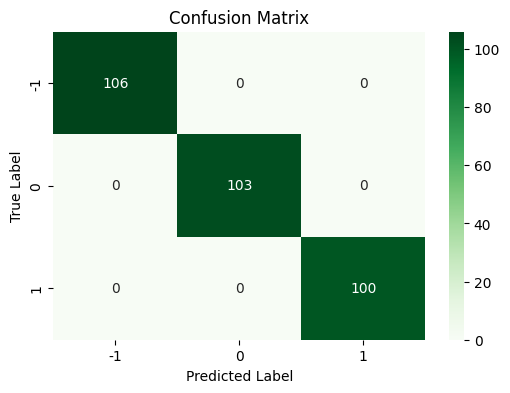

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[-1,0,1], yticklabels=[-1,0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

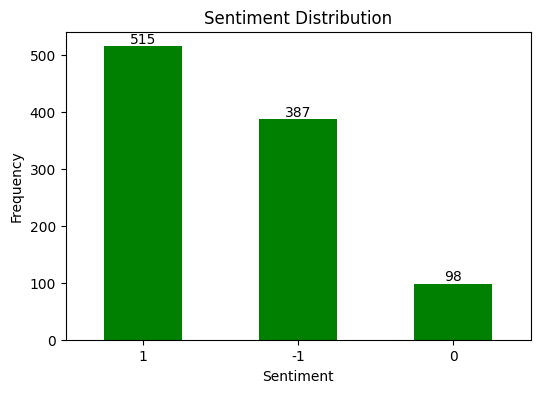

In [43]:
# y contains sentiment labels
sentiment_distribution = y.value_counts()

# Plot the distribution before SMOTE
plt.figure(figsize=(6, 4))
ax = sentiment_distribution.plot(kind='bar', color='green')

# Add frequency values on top of each bar
for i, v in enumerate(sentiment_distribution):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

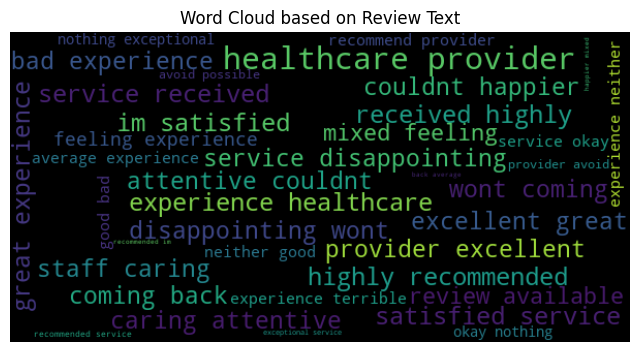

In [44]:
# Concatenate all the strings into one
all_words = " ".join(df['Cleaned_Reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=300, random_state=42, max_font_size=30, background_color='black').generate(all_words)

# Plotting the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on Review Text')
plt.show()


In [45]:
df.head()

,Review_Text,Rating,Tokenized_Review_Text,Stopwords_Removed,Lemmatized_Reviews,Stemmed_Reviews,POS_Tagged,Cleaned_Reviews,Sentiment_Polarity,Sentiment
0,i have mixed feelings about my experience,4,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[mix, feel, experi]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience,0.0,0
1,the staff was caring and attentive i couldnt b...,5,"[the, staff, was, caring, and, attentive, i, c...","[staff, caring, attentive, couldnt, happier]","[staff, caring, attentive, couldnt, happier]","[staff, care, attent, couldnt, happier]","[(staff, NN), (caring, VBG), (attentive, JJ), ...",staff caring attentive couldnt happier,0.4,1
2,i have mixed feelings about my experience,5,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[mix, feel, experi]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience,0.0,0
3,i have mixed feelings about my experience,5,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[mix, feel, experi]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience,0.0,0
4,the healthcare provider was excellent i had a ...,3,"[the, healthcare, provider, was, excellent, i,...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...","[healthcar, provid, excel, great, experi]","[(healthcare, NN), (provider, NN), (excellent,...",healthcare provider excellent great experience,0.9,1


In [46]:
from collections import Counter
# Count word frequencies
word_freq = Counter([word for tokens in df['Lemmatized_Reviews'] for word in tokens])

# top 10 recurring words
top_10_words = word_freq.most_common(10)

# Print the results
print("Top 10 Recurring Words:")
for word, count in top_10_words:
    print(f"{word}")

Top 10 Recurring Words:
experience
service
provider
healthcare
bad
im
satisfied
received
highly
recommended


In [47]:
# x=df['Cleaned_Reviews'].values
# y=df['Sentiment'].values

In [48]:
countvectorizer = CountVectorizer()

x_cv = countvectorizer.fit_transform(x)

In [49]:
dataset_analysis = pd.DataFrame(x_cv.toarray(), columns=countvectorizer.get_feature_names_out())
dataset_analysis['Sentiment']=y

In [50]:
dataset_analysis.shape

(1000, 37)

## Positive Sentiment Analysis


In [51]:
df_pos=dataset_analysis.query("Sentiment==1")
positive_df=pd.DataFrame()
positive_df['Words']=list(df_pos.iloc[:, :-1].columns)
positive_df['Frequency']=df_pos.iloc[:, :-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.head()

,Words,Frequency
31,service,208
18,highly,117
30,satisfied,117
28,recommended,117
26,received,117


## Negative Sentiment Analysis

In [52]:
df_neg=dataset_analysis.query("Sentiment==-1")
negative_df=pd.DataFrame()
negative_df['Words']=list(df_neg.iloc[:, :-1].columns)
negative_df['Frequency']=df_neg.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.head()

,Words,Frequency
12,experience,281
25,provider,187
5,bad,184
31,service,106
9,disappointing,106


## Neutral Sentiment Analysis 

In [53]:
df_neu=dataset_analysis.query("Sentiment==0")
neutral_df=pd.DataFrame()
neutral_df['Words']=list(df_new.iloc[:, :-1].columns)
neutral_df['Frequency']=df_new.iloc[:, :-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.head()

,Words,Frequency
12,experience,281
25,provider,187
5,bad,184
31,service,106
9,disappointing,106


# Insights:


## Most frequently used words:
- Top 10 Recurring Words: 
  - experience
  - service
  - provider
  - healthcare
  - bad
  - im
  - satisfied
  - received
  - highly
  - recommended

- Positive Reviews : Customers are highly satisfied and recommend the service.
  - service	208
  - highly	117
  - satisfied	117
  - recommended	117
  - received	117 
- Positive reviews : 

- Negative Reviews : Customers had a bad, disappointing experience and service.
  - experience	281
  - provider	187
  - bad	184
  - service	106
  - disappointing	106
- Negative reviews : 

- Neutral Reviews : Customers had a bad, disappointing experience and service.
  - experience	281
  - provider	187
  - bad	184
  - service	106
  - disappointing	106